In [1]:
import bcolz
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D

from mydatools import img_plot

%matplotlib inline

Using Theano backend.
Using cuDNN version 5103 on context None
Mapped name None to device cuda: Tesla K80 (0000:00:1E.0)


In [2]:
# path = 'data/input/all/'
path = 'data/input/sample/'

In [3]:
def get_batches(dirname, gen=ImageDataGenerator(), shuffle=True, batch_size=4, class_mode='categorical',
                target_size=(224,224)):
    return gen.flow_from_directory(dirname, target_size=target_size,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

def get_data(path, target_size=(224,224)):
    batches = get_batches(path, shuffle=False, batch_size=1, target_size=target_size)
    bb = zip(*[batches.next() for i in range(batches.samples)])
    X = np.concatenate(bb[0])
    y = np.concatenate(bb[1])
    return X, y

def get_class(a_onehot):
    return a_onehot.argmax(axis=1)

Found 1800 images belonging to 2 classes.


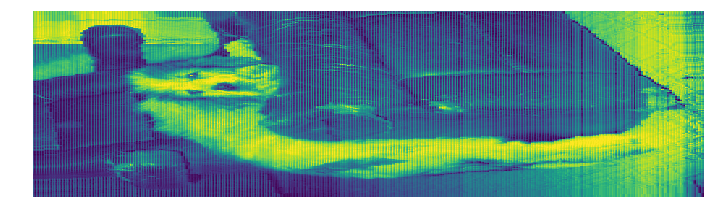

In [11]:
gen = ImageDataGenerator(rotation_range=10)

batches = gen.flow_from_directory(path+'train', batch_size=4)

imgs, labels = next(batches)
b2 = gen.flow(np.expand_dims(imgs[0], 0))
img_plot.img_plots(b2.next()[0])

In [13]:
b2 = gen.flow(np.expand_dims(imgs[0], 0))

In [8]:
# # gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
# #        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
# #        channel_shift_range=10., horizontal_flip=True)
# gen = ImageDataGenerator(rotation_range=10)

# batches = gen.flow_from_directory(path+'train', batch_size=4)

# imgs, labels = next(batches)
# img_plot.img_plots(imgs, (20,7), titles=labels)

In [ ]:
imgs = 